In [320]:
import numpy as np
import random 
import matplotlib.pyplot as plt
import math
import copy
import time
from sklearn.decomposition import PCA
import scanpy as sc


In [321]:
adata = sc.read_10x_mtx(
    r'/Users/alisa/Desktop/filtered_gene_bc_matrices/hg19',  
    var_names='gene_symbols',                  # use gene symbols for the variable names (variables-axis index)
    cache=True)   

x = adata._X.todense()


In [322]:
print (x)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [323]:
import numpy as np
from sklearn.decomposition import PCA

p = PCA(n_components = 2)
p.fit (x)

x_transformed = p.transform(x)

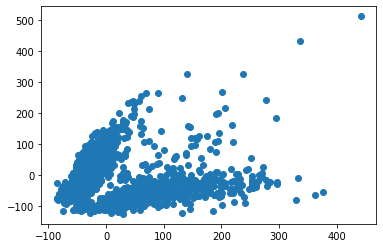

In [324]:
%matplotlib inline

import matplotlib.pyplot as plt

x_transformedx = x_transformed

plt.scatter(x_transformedx[:, 0], x_transformedx[:, 1])
plt.show()



In [325]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 3)
model.fit(x_transformedx)

labels = model.labels_

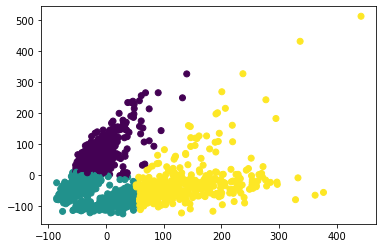

In [326]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.scatter(
x_transformedx[:, 0], 
x_transformedx[:, 1], c = labels)


plt.show()


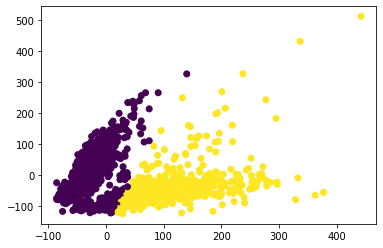

In [327]:


#Muss normaler Kmeans sein 
kmeans = KMeans(n_clusters=2, random_state=0).fit(x_transformedx)

labels = kmeans.labels_

plt.scatter(
x_transformedx[:, 0], 
x_transformedx[:, 1], c = labels)


plt.show()

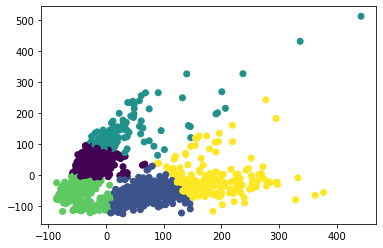

In [328]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=5, random_state=0,  batch_size=6)
kmeans.fit(x_transformedx)
labels = kmeans.labels_

plt.scatter(
x_transformedx[:, 0], 
x_transformedx[:, 1], c = labels)


plt.show()